In [12]:
%matplotlib inline
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from time import time
import sys
sys.path.append('..')
from scipy.stats import chi2_contingency

from models.ml.utils import load_csv_to_df

path = "../models/data/"
filename = "dataset.csv"

## Explore data to gain insights 

        Look at features distributions with bar plot
        Look at Cramer's V between ICT1 and categorical features

In [2]:
df = load_csv_to_df(path, filename)

In [3]:
df.shape

(5279822, 40)

### Null count

In [5]:
# Check null count
df.isnull().sum().sum()

1

In [6]:
disc = df.columns.drop(["ident", "rome"])

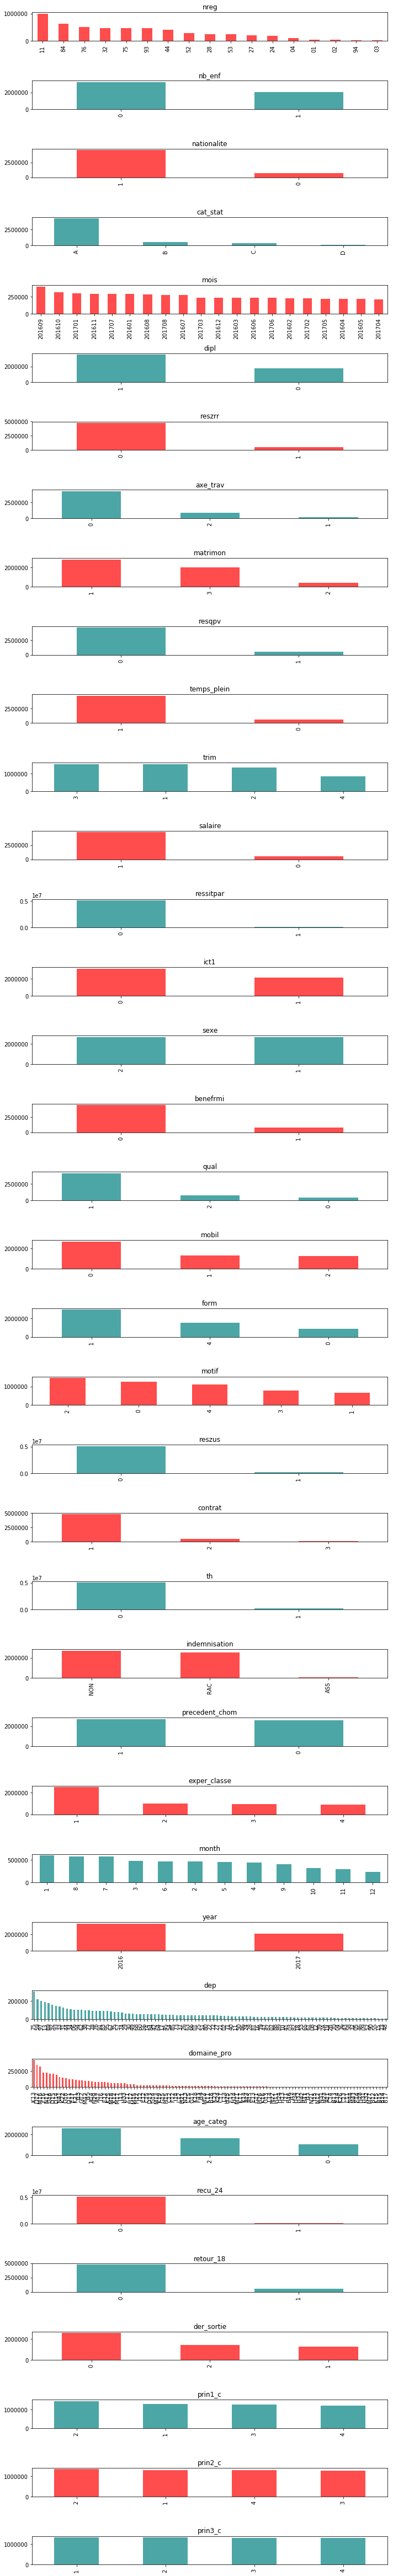

In [7]:
figsize = (10,65)
ncol = 1
nrow = len(disc)
fig, axes = plt.subplots(nrow, ncol, figsize=figsize)
k=0

for j in range(nrow):
    if k % 2 == 0:
        c = 'r'
    else:
        c = 'teal'
    df[disc[k]].value_counts().plot(kind='bar', title=disc[k], figsize=figsize, ax=axes[j], color=c, alpha=0.7)
    k=k+1
    
plt.tight_layout()

### Cramer's V :  ICT1 / categorical fields

the stats.chi2_contingency() function to conduct a test of independence automatically given a frequency table of observed counts.

The output shows the chi-square statistic, the p-value and the degrees of freedom followed by the expected counts.

In [8]:
df.set_index("ident", inplace=True)

In [9]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [10]:
col_list = df.columns.drop(["ict1", "year"])

In [13]:
cramer = pd.DataFrame(index=col_list, columns=["cramer_v"])

# convert to categories type
for col in col_list:
    df[col] = df[col].astype('category')
    cramer.loc[col, "cramer_v"] = cramers_corrected_stat(pd.crosstab(df.ict1, df[col]))

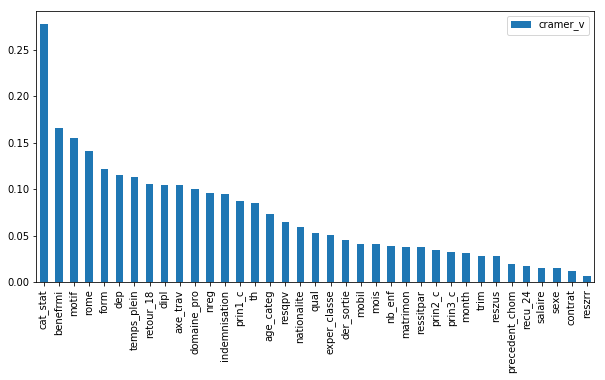

In [14]:
cramer.sort_values(by="cramer_v", ascending=False).plot(kind="bar", figsize=(10, 5))
plt.show()